<a href="https://www.kaggle.com/code/rajatraj0502/exploratory-data-analysis-of-top-1000-games?scriptVersionId=138310256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-steam-games/steamspy_data.csv
/kaggle/input/top-1000-steam-games/steam_app_data.csv


In [2]:
# Load the CSV files
steamspy_data = pd.read_csv('/kaggle/input/top-1000-steam-games/steamspy_data.csv')
steam_app_data = pd.read_csv('/kaggle/input/top-1000-steam-games/steam_app_data.csv')

# Preview the data
steamspy_data.head(), steam_app_data.head()


(   appid                       name         developer publisher  score_rank  \
 0     10             Counter-Strike             Valve     Valve         NaN   
 1     20      Team Fortress Classic             Valve     Valve         NaN   
 2     30              Day of Defeat             Valve     Valve         NaN   
 3     40         Deathmatch Classic             Valve     Valve         NaN   
 4     50  Half-Life: Opposing Force  Gearbox Software     Valve         NaN   
 
    positive  negative  userscore                    owners  average_forever  \
 0    216345      5530          0  10,000,000 .. 20,000,000                0   
 1      6472       990          0   5,000,000 .. 10,000,000                0   
 2      5686       634          0   5,000,000 .. 10,000,000                0   
 3      2242       490          0   5,000,000 .. 10,000,000                0   
 4     17468       890          0    2,000,000 .. 5,000,000                0   
 
    average_2weeks  median_forever  

In [3]:
# Check for missing values in both datasets
missing_values_steamspy = steamspy_data.isnull().sum()
missing_values_steam_app = steam_app_data.isnull().sum()

missing_values_steamspy, missing_values_steam_app


(appid                 0
 name                  0
 developer             1
 publisher             0
 score_rank         1000
 positive              0
 negative              0
 userscore             0
 owners                0
 average_forever       0
 average_2weeks        0
 median_forever        0
 median_2weeks         0
 price                 0
 initialprice          0
 discount              0
 languages             0
 genre                 3
 ccu                   0
 tags                  0
 dtype: int64,
 type                          6
 name                          0
 steam_appid                   0
 required_age                  6
 is_free                       6
 controller_support          593
 dlc                         443
 detailed_description          6
 about_the_game                6
 short_description             6
 fullgame                   1000
 supported_languages           6
 header_image                  6
 website                     126
 pc_requirements       

In [4]:
# Check for duplicates
duplicates_steamspy = steamspy_data.duplicated().sum()
duplicates_steam_app = steam_app_data.duplicated().sum()

duplicates_steamspy, duplicates_steam_app


(0, 1)

In [5]:
# Remove duplicates from the steam_app_data dataset
steam_app_data = steam_app_data.drop_duplicates()

# Check again for duplicates to confirm
duplicates_steam_app = steam_app_data.duplicated().sum()
duplicates_steam_app


0

In [6]:
# Fill missing values for categorical columns with "Unknown"
categorical_columns = ['type', 'controller_support', 'dlc', 'website', 'legal_notice', 
                       'drm_notice', 'ext_user_account_notice', 'demos', 'price_overview', 
                       'packages', 'categories', 'genres', 'screenshots', 'movies', 'recommendations']

steam_app_data[categorical_columns] = steam_app_data[categorical_columns].fillna('Unknown')

# Check the missing values again
missing_values_steam_app = steam_app_data.isnull().sum()
missing_values_steam_app


type                         0
name                         0
steam_appid                  0
required_age                 6
is_free                      6
controller_support           0
dlc                          0
detailed_description         6
about_the_game               6
short_description            6
fullgame                   999
supported_languages          6
header_image                 6
website                      0
pc_requirements              6
mac_requirements             6
linux_requirements           6
legal_notice                 0
drm_notice                   0
ext_user_account_notice      0
developers                   7
publishers                   6
demos                        0
price_overview               0
packages                     0
package_groups               6
platforms                    6
metacritic                 414
reviews                    627
categories                   0
genres                       0
screenshots                  0
movies  

In [7]:
# Fill missing values for numerical columns with 0
numerical_columns = ['metacritic', 'reviews', 'achievements']

steam_app_data[numerical_columns] = steam_app_data[numerical_columns].fillna(0)

# Check the missing values again
missing_values_steam_app = steam_app_data.isnull().sum()
missing_values_steam_app


type                         0
name                         0
steam_appid                  0
required_age                 6
is_free                      6
controller_support           0
dlc                          0
detailed_description         6
about_the_game               6
short_description            6
fullgame                   999
supported_languages          6
header_image                 6
website                      0
pc_requirements              6
mac_requirements             6
linux_requirements           6
legal_notice                 0
drm_notice                   0
ext_user_account_notice      0
developers                   7
publishers                   6
demos                        0
price_overview               0
packages                     0
package_groups               6
platforms                    6
metacritic                   0
reviews                      0
categories                   0
genres                       0
screenshots                  0
movies  

In [8]:
# Descriptive statistics for steamspy_data
steamspy_data.describe(include=[np.number])


,appid,score_rank,positive,negative,userscore,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
count,1.000000e+03,0.0,1.000000e+03,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0000,1.000000e+03
mean,4.756415e+05,NaN,7.109154e+04,10722.915000,0.0,0.0,0.0,0.0,0.0,1487.210000,1781.661000,10.2550,6.262127e+03
std,4.304935e+05,NaN,2.453947e+05,44979.287885,0.0,0.0,0.0,0.0,0.0,1554.987365,1694.741439,25.5569,4.211502e+04
min,1.000000e+01,NaN,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,0.000000e+00
25%,2.121375e+05,NaN,1.145750e+04,1663.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,8.675000e+01
50%,3.325100e+05,NaN,2.600050e+04,3347.000000,0.0,0.0,0.0,0.0,0.0,999.000000,1499.000000,0.0000,4.590000e+02
75%,6.446525e+05,NaN,6.161475e+04,7280.500000,0.0,0.0,0.0,0.0,0.0,1999.000000,2999.000000,0.0000,2.033500e+03
max,2.050650e+06,NaN,6.547618e+06,939005.000000,0.0,0.0,0.0,0.0,0.0,6999.000000,8499.000000,90.0000,1.088407e+06


In [9]:
# Since many columns in steam_app_data are not actually numerical but contain complex information, we will describe only a few.
steam_app_data[['steam_appid', 'required_age']].describe()


,steam_appid,required_age
count,9.990000e+02,993.000000
mean,4.740564e+05,2.377644
std,4.307718e+05,5.671926
min,1.000000e+01,0.000000
25%,2.119450e+05,0.000000
50%,3.314700e+05,0.000000
75%,6.414050e+05,0.000000
max,2.050650e+06,18.000000


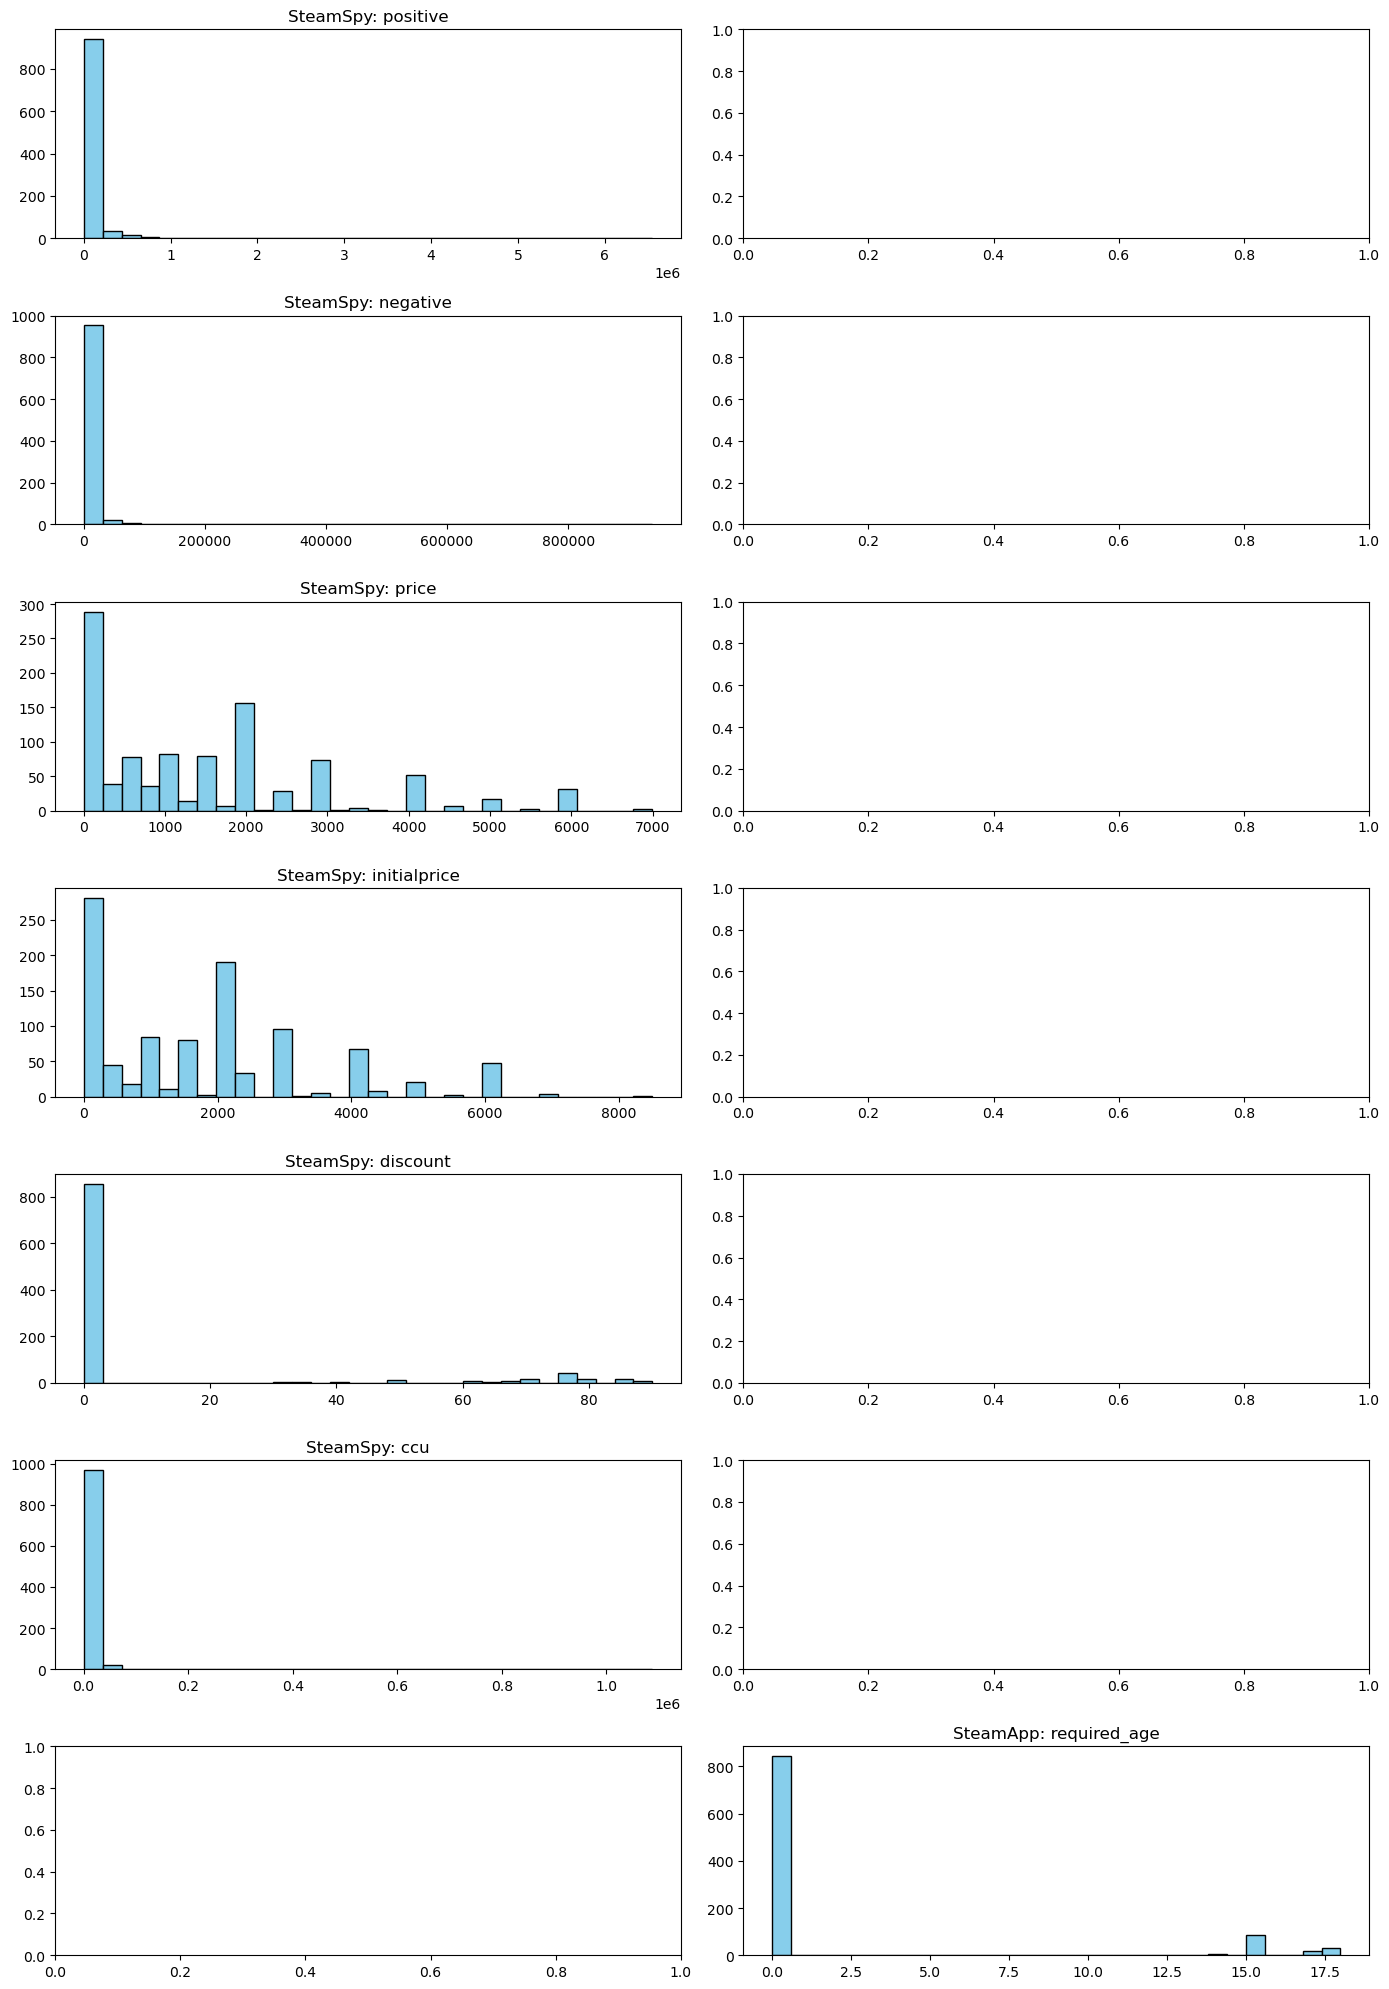

In [10]:
import matplotlib.pyplot as plt

# List of columns for which we'll plot histograms
columns = ['positive', 'negative', 'price', 'initialprice', 'discount', 'ccu', 'required_age']

# Plot histograms for the selected columns
fig, axs = plt.subplots(len(columns), 2, figsize=(14, 20))

for i, column in enumerate(columns):
    if column in steamspy_data.columns:
        axs[i, 0].hist(steamspy_data[column], bins=30, color='skyblue', edgecolor='black')
        axs[i, 0].set_title(f'SteamSpy: {column}')
    
    if column in steam_app_data.columns:
        axs[i, 1].hist(steam_app_data[column], bins=30, color='skyblue', edgecolor='black')
        axs[i, 1].set_title(f'SteamApp: {column}')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


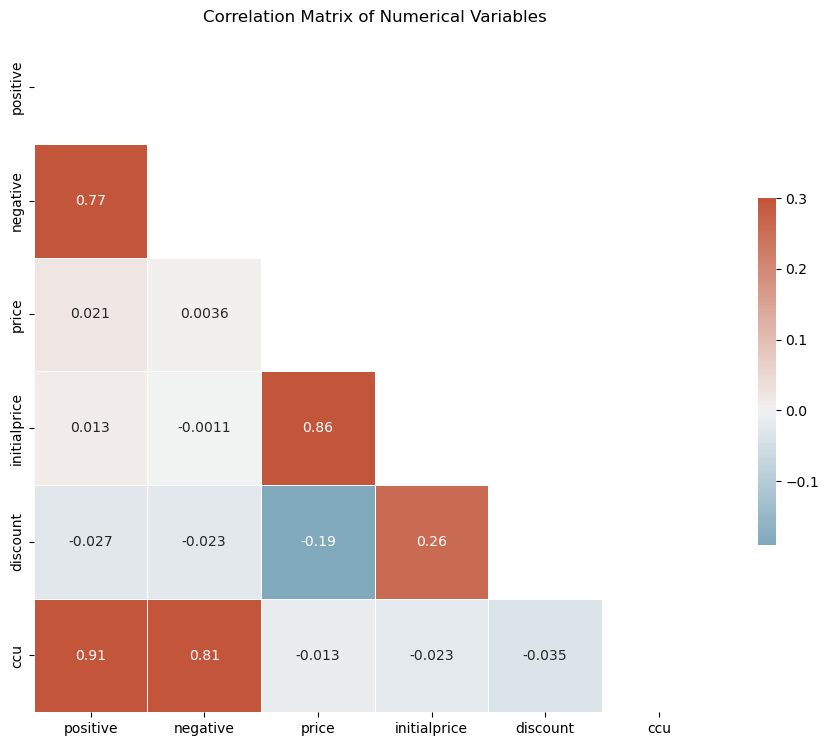

In [11]:
import seaborn as sns

# Selecting the columns for the correlation analysis
correlation_columns = ['positive', 'negative', 'price', 'initialprice', 'discount', 'ccu']

# Compute the correlation matrix
corr = steamspy_data[correlation_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [12]:
# Top 10 games with most positive reviews
top_10_positive_reviews = steamspy_data.nlargest(10, 'positive')

top_10_positive_reviews[['name', 'positive']]


,name,positive
25,Counter-Strike: Global Offensive,6547618
22,Dota 2,1659573
401,Grand Theft Auto V,1360117
706,PUBG: BATTLEGROUNDS,1260926
189,Terraria,1137066
525,Tom Clancy's Rainbow Six Siege,998163
37,Garry's Mod,949375
19,Team Fortress 2,909911
367,Rust,824082
21,Left 4 Dead 2,742846


In [13]:
# Top 10 games with most concurrent users
top_10_ccu = steamspy_data.nlargest(10, 'ccu')

top_10_ccu[['name', 'ccu']]


,name,ccu
25,Counter-Strike: Global Offensive,1088407
22,Dota 2,524317
706,PUBG: BATTLEGROUNDS,292875
897,Apex Legends,275974
905,NARAKA: BLADEPOINT,192346
401,Grand Theft Auto V,159766
367,Rust,124008
19,Team Fortress 2,120722
604,Wallpaper Engine,107140
994,Call of Duty: Modern Warfare II,70574


In [14]:
# Let's take a look at the 'genre' column
steamspy_data['genre'].value_counts().head(10)


Action                           148
Action, Adventure                 98
Strategy                          41
Action, RPG                       36
Action, Adventure, Indie          34
Action, Indie                     28
Action, Free to Play              26
RPG                               24
Action, Adventure, RPG            21
Action, Adventure, Indie, RPG     20
Name: genre, dtype: int64

In [15]:
# Split the 'genre' column and count individual genres
genres = steamspy_data['genre'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()

# Display the top 10 genres
genre_counts.head(10)


Action                   666
Adventure                369
Indie                    362
RPG                      247
Strategy                 202
Free to Play             198
Simulation               188
Massively Multiplayer    124
Casual                   111
Sports                    44
Name: genre, dtype: int64

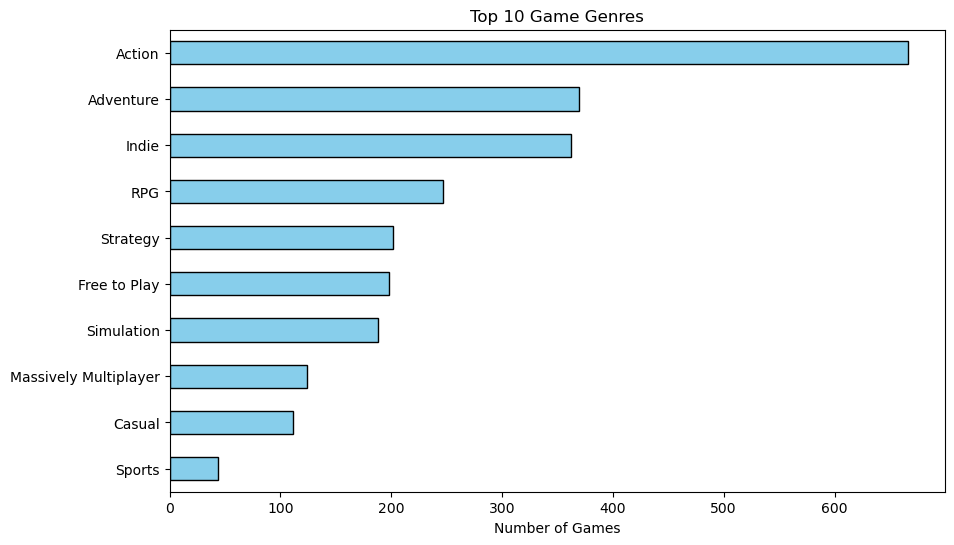

In [16]:
# Plot the top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.head(10).sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Games')
plt.title('Top 10 Game Genres')
plt.show()


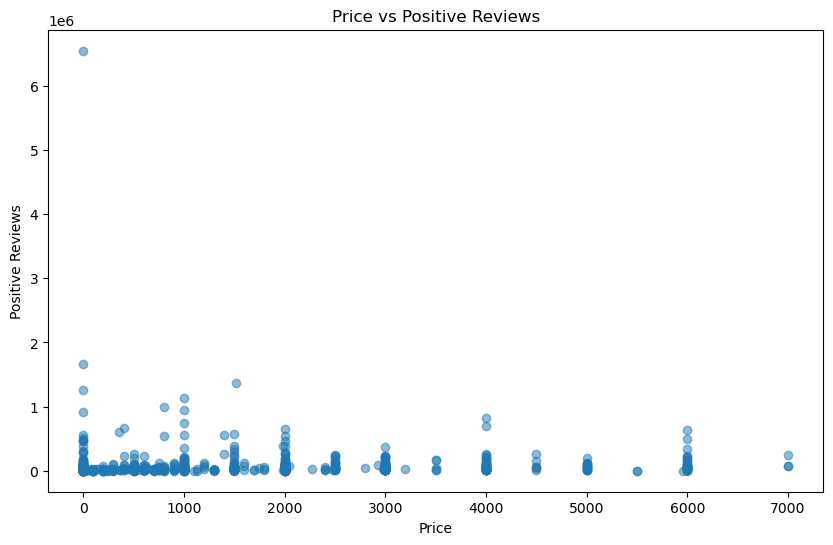

In [17]:
# Scatter plot of price vs positive reviews
plt.figure(figsize=(10, 6))
plt.scatter(steamspy_data['price'], steamspy_data['positive'], alpha=0.5)
plt.title('Price vs Positive Reviews')
plt.xlabel('Price')
plt.ylabel('Positive Reviews')
plt.show()


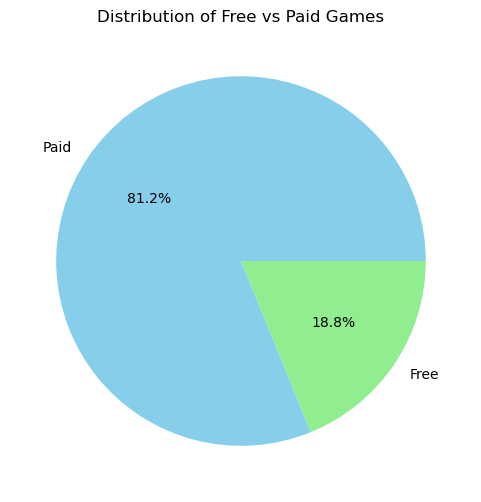

In [18]:
# Exclude 'Unknown' values
free_counts = steam_app_data[steam_app_data['is_free'] != 'Unknown']['is_free'].value_counts()

# Pie chart of free vs non-free games
plt.figure(figsize=(6, 6))
plt.pie(free_counts, labels=['Paid', 'Free'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Free vs Paid Games')
plt.show()


In [19]:
# Split the 'tags' column and count individual tags
tags = steamspy_data['tags'].str.split(',').explode().str.strip()
tag_counts = tags.value_counts()

# Display the top 10 tags
tag_counts.head(10)


'VR Only': 1}          8
'Singleplayer': 109    6
'Singleplayer': 79     5
'Singleplayer': 114    5
'Singleplayer': 167    5
'Adventure': 119       5
'Multiplayer': 275     5
'Adventure': 88        5
'Open World': 192      5
'Co-op': 79            5
Name: tags, dtype: int64

In [20]:
# Split the 'tags' column on colon and count individual tags
tags = steamspy_data['tags'].str.split(',').explode().str.strip().str.split(':').str[0].str.strip("'")
tag_counts = tags.value_counts()

# Display the top 10 tags
tag_counts.head(10)


Singleplayer        827
Action              713
Multiplayer         676
Adventure           635
Co-op               472
Atmospheric         464
Open World          379
First-Person        361
Shooter             342
Great Soundtrack    340
Name: tags, dtype: int64

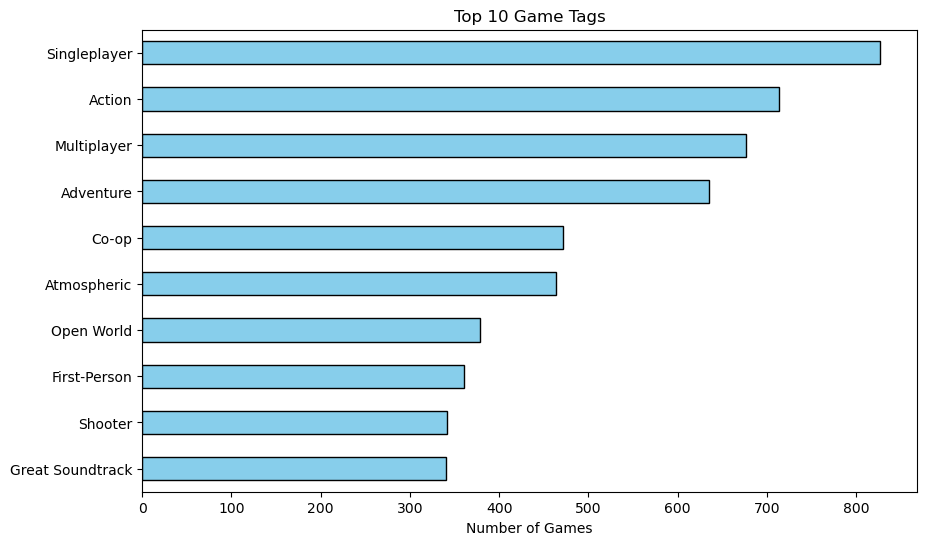

In [21]:
# Plot the top 10 tags
plt.figure(figsize=(10, 6))
tag_counts.head(10).sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Games')
plt.title('Top 10 Game Tags')
plt.show()
